<center>
<h2>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h2>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 2020</h3>
<h3>Predicción de la Calidad de Servicio</h3>
<h3>Análisis y Visualización</h3>
</center>
</left>
<h4>Mentor: Martín Hunziker</h4>

[Link Mentoria](https://sites.google.com/view/mentorias2020-diplodatos/ciencia-de-datos-aplicada-en-la-distribuci%C3%B3n-de-energ%C3%ADa-el%C3%A9ctrica?authuser=0).

</left>
</left>

## Consigna para Informe de Análisis y Visualización

### General

Se propone la **elaboración de un informe o presentación en formato estatico (pdf, slides) o dinamico (Pagina Web, Markdown)** que deberá entregarse en formato html o pdf y deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.<br>

No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes para comunicar.

### 1 - Analisis General

- ¿Cuántas entradas posee el dataset y que representa cada una?
- Si queremos analizar calidad de servicio, ¿cuál seria a su parece la variable de salida?

### 2 - Analisis Estadistico

- ¿Cuáles son las variables númericas?
- ¿Cuánto valen los principales estadisticos?
- ¿Existen valores que no sean validos? ¿Cuáles? ¿Qué se puede hacer en esos casos?
- ¿Poseen outliers? ¿Qué técnicas se pueden utilizar para mitigar su impacto?.
- ¿Cómo es la distribución de los valores? ́¿Son normales?
- Calcule los principales estadisticos despues del preprocesamiento.

Adicione los gráficos o tablas que considere oportuno para graficar los puntos anteriores.

- ¿Cuáles son las variables categoricas? ¿Cual es la cardinalidad de las mismas?
- En base a la respuesta anterior,  ¿vale la manera mantenerlas a todas?
- ¿Cuáles son los 3 valores mas comunes de cada categoría?
- Escoja 2 variables y grafique sus niveles contra la cantidad de apariciones.
- Cuando sea posible, calcule la correlación entre cada variable y la salida, y entre variables.
- ¿Cuál es la variable de mayor correlación con la salida?.
- ¿Qué variables estan altamente correlacionadas entre si? ¿qué se puede hacer con ellas?
- Escoja una variable categórica y calcule las distribuciones condicionales para cada nivel de la misma.
- ¿Cómo podemos saber si las distribuciones condicionales son diferentes entre ellas?

### 3. Preguntas Disparadoras
A continuación se presenta una serie de ***preguntas disparadoras***, a modo de ayuda para encaminar el análisis y la visualización de los datos que deberán responderlas de manera obligatoria. 

- ¿Cómo se distribuye el consumo mensual del dataset de forma global, por categoría tarifaria (GRU_TAR) y por alimentador (CTMT)? 
- ¿Cuántos consumidores tienen un consumo mensual promedio superior a 100 kWh? Y más de 500 kWh?
- ¿Cómo se correlacionan el consumo mensual y la categoria tarifaria? Explorar las métricas o estadísticos dentro de cada clase y compararlas.
- ¿Cómo se distribuyen el consumo promedio, el FIC y el DIC y el Conjunto Electrico (CONJ), el Alimentador (CTMT), el Transformador de Ditribucion (UNI_TR_D), la categoria tarifaria (GRU_TAR) y Localización(ARE_LOC)? Explorar las métricas o estadísticos dentro de cada y compararlas.


### 4 - Preguntas Opcionales

- ¿Cuál es la conjunto electrico con menor cantidad de interrupciones (FEC = promedio ponderado por usuarios FIC)? Hay mucha disparidad entre la calidad de los diferentes conjuntos?
- ¿Cuál es la conjunto electrico con menor duracion de interrupciones (DEC = promedio ponderado por usuarios DIC)? Hay mucha disparidad entre la calidad de los diferentes conjuntos?
- ¿Cuál es la conjunto electrico con menor duracion unitaria (DEC/FEC) de interrupciones? Hay mucha disparidad entre la calidad de los diferentes conjuntos?


### Importaciones

In [ ]:
!wget -nc https://github.com/mahunz/Diplodatos2020/blob/master/Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z?raw=true
!apt-get install p7zip
!mkdir -p Dataset
!mv ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z?raw=true ./Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z
!7za x ./Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z
!mv ENF_6612_2018-12-31_M10_20190529-1610.gdb ./Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb
!pip install geopandas
!pip install pandas

--2020-08-21 14:36:12--  https://github.com/mahunz/Diplodatos2020/blob/master/Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mahunz/Diplodatos2020/raw/master/Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z [following]
--2020-08-21 14:36:12--  https://github.com/mahunz/Diplodatos2020/raw/master/Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mahunz/Diplodatos2020/master/Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z [following]
--2020-08-21 14:36:12--  https://raw.githubusercontent.com/mahunz/Diplodatos2020/master/Dataset/ENF_6612_2018-12-31_M10_20190529-1610.gdb.7z
Resolving raw.githubusercontent.com (raw.githubuserconten

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import fiona
import seaborn
from matplotlib.pyplot import figure
from pylab import *

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

### Lectura de datos

In [ ]:
# Mostramos la lista de layers (capas) que tiene el dataset

path_data = './Dataset/'
path_base = path_data+'ENF_6612_2018-12-31_M10_20190529-1610.gdb'

print(fiona.listlayers(path_base))

['BAR', 'BASE', 'BAY', 'BE', 'CTAT', 'CTMT', 'EP', 'EQCR', 'EQME', 'EQRE', 'EQSE', 'EQSIAT', 'EQTRD', 'EQTRM', 'EQTRS', 'EQTRSX', 'INDGER', 'PIP', 'PNT', 'PT', 'RAMLIG', 'SEGCON', 'ARAT', 'CONJ', 'PONNOT', 'SSDAT', 'SSDBT', 'SSDMT', 'SUB', 'UCAT', 'UCBT', 'UCMT', 'UGAT', 'UGBT', 'UGMT', 'UNCRAT', 'UNCRBT', 'UNCRMT', 'UNREAT', 'UNREMT', 'UNSEAT', 'UNSEBT', 'UNSEMT', 'UNTRD', 'UNTRS']


In [ ]:
# Cargamos la layer (tabla geográfica) UCBT (Consumidores de Baja Tensión) una variable

_ds = gpd.read_file(path_base, driver='FileGDB', layer='UCBT')
_ds.head()

,DIST,PAC,PN_CON,UNI_TR_D,CTMT,UNI_TR_S,SUB,CONJ,MUN,BRR,CEP,CLAS_SUB,CNAE,TIP_CC,FAS_CON,GRU_TEN,TEN_FORN,GRU_TAR,SIT_ATIV,DAT_CON,CAR_INST,LIV,ENE_01,ENE_02,ENE_03,ENE_04,ENE_05,ENE_06,ENE_07,ENE_08,ENE_09,ENE_10,ENE_11,ENE_12,DIC,FIC,SEMRED,DESCR,ARE_LOC,geometry
0,6612,77407900752992400BT,27148349,26876319,27117483,27707534,27335513,15616,3303401,LUMIAR,28610000,RE1,99999,RES-Tipo8,A,BT,15,B1,AT,19/09/1997,6.0,0,343.0,325.0,265.0,193.0,153.0,122.0,150.0,150.0,143.0,139.0,166.0,168.0,31.59,9.0,1,,UB,POINT (-42.33951 -22.31468)
1,6612,77580298752558226BT,27156584,26876397,27117483,27707534,27335513,15616,3303401,AREA RURAL,28610000,RE1,99999,RES-Tipo8,A,BT,15,B1,AT,19/09/1997,6.0,0,115.0,133.0,110.0,94.0,112.0,111.0,112.0,126.0,118.0,135.0,100.0,83.0,2.32,3.0,1,,UB,POINT (-42.32204 -22.35359)
2,6612,77401136752897220BT,27161605,26876353,27117483,27707534,27335513,15616,3303401,S P DA SERRA,28610000,RE1,99999,RES-Tipo8,BC,BT,15,B1,AT,19/09/1997,6.0,0,96.0,107.0,99.0,99.0,126.0,108.0,113.0,104.0,92.0,99.0,110.0,94.0,38.01,10.0,1,,NU,POINT (-42.34000 -22.32328)
3,6612,75220000753924000BT,27145426,26877848,27117490,27707625,27335509,16069,3303401,SAO GERALDO,28610000,RE1,99999,RES-Tipo8,B,BT,15,B1,AT,10/05/1990,6.0,0,216.0,202.0,199.0,179.0,231.0,204.0,217.0,205.0,184.0,220.0,197.0,197.0,1.81,3.0,1,,UB,POINT (-42.55320 -22.23394)
4,6612,75263876752971567BT,27138403,26879884,80345445,80345241,27335511,16070,3303401,OLARIA,28610000,RE1,99999,RES-Tipo8,B,BT,15,B1,AT,31/07/1988,6.0,0,223.0,128.0,116.0,221.0,114.0,72.0,73.0,163.0,146.0,114.0,139.0,227.0,1.55,3.0,1,,UB,POINT (-42.54744 -22.31984)


Las variables `DIC`= Duración de la Interrupción por consumidor [h] y `FIC`= Cantidad de Interrupciones por consumidor constituyen nuestros objetivos de predicción.

### Analisis General

#### ¿Cuántas entradas posee el dataset y que representa cada una?

In [ ]:
# Obtenemos la cantidad de filas y columnas del Dataset Original
_shape = _ds.shape
print("Nuestro Dataset original tiene", _shape[0], "filas y", _shape[1],"columnas.")

Nuestro Dataset original tiene 108346 filas y 40 columnas.


Nuestro Dataset del año 2018 tiene 108346 filas y 40 columnas. Cada fila representa a un usuario en particular de la red. Dentro de las 40 columnas, podemos encontrar como datos relevantes el consumo del año para cada mes en particular, la duración de interrupciones por consumidor (DIC) por hora y la frecuencia de interrupciones por consumidor (FIC). Además, tenemos la variable “ARE_LOC” que nos indica si el área del usuario es urbana o rural o no identificada, para el caso de que no contemos de su registro.
* Por otro lado, el Dataset nos brinda información sobre los activos que tiene la empresa dentro de su red de distribución. Como lo son: 
PAC	PN_CON UNI_TR_D	CTMT	UNI_TR_S	SUB	CONJ
* Es  importante destacar que estos activos se encuentran georeferenciados y esto nos permitirá evaluar distancias desde las fuentes a los consumidores, analizar el impacto de la DIC y FIC segun la distancia entre estos. Para futuro, es bueno que recordemos que una mayor distancia entre la fuente de energía y el consumidor, implica mayor inversión en la red de distribución eléctrica. 
* Tambien tenemos información de los tipos de consumidores, sus cuadros tarifarios asociados, curvas de cargas y su carga total instalada. Estas las encontramos como variables categóricas, "GRUO_TAR" y "CARG_INST CNAE".
* Para finalizar, las variables ENE_01 a ENE_12 reflejan el consumo mensual por usuario. Con estos valores, calculamos la desviación estandar, la media y el valor máximo. Estos tres nuevos datos los agregamos como columnas nuevas a la tabla ucbt. 



Si queremos analizar calidad de servicio, ¿cuál sería a su parecer la variable de salida?

Creemos que a la calidad del servicio por usuario, la podemos analizar en base a la duración de los cortes (DIC). Si vemos que es un número alto, podemos concluir que el servicio que se le brinda a dicho usuario es de baja calidad. Además, la frecuencia de interrupciones por consumidor (FIC) también aporta informacion relevante para analizar la calidad de servicio.

Otro punto a tener en cuenta para analizar de la calidad de servicio, es la relación que existe entre el tipo de área y las variables FIC y DIC. No es lo mismo analizar la duración y frecuencia de cortes de un área rural con respecto a una área urbana. Cabe destacar que en las zonas urbanas contamos con una mayor cantidad de usuarios y por ende, mayor consumo.

* Con respecto a las zonas urbanas, vemos que estas estan subdivididas en barrios y para el futuro será importante analizar la ocurrencia de la (FIC) y la(DIC) para cada barrio en particular.


In [ ]:
# Convertimos los identificadores de los conjuntos a strings
_ds['DIST'] = _ds.DIST.astype(str)
_ds['LIV'] = _ds.LIV.astype(str)
_ds['CONJ'] = _ds.CONJ.astype(str)
_ds['DAT_CON'] = pd.to_datetime(_ds.DAT_CON, dayfirst=True, format='%d/%m/%Y')

In [ ]:
# Clasificar columnas en categoricas y numericas
cat_ft = _ds.columns[_ds.dtypes == 'object']
num_ft = _ds.columns[_ds.dtypes != 'object']

In [ ]:
# Agrupando Variables

_ds['ENE_MED'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].mean(axis=1)
_ds['ENE_STD'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].std(axis=1)
_ds['ENE_MAX'] = _ds[['ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05', 'ENE_06', 'ENE_07','ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12']].max(axis=1)

### Análisis Estadístico

#### ¿Cuáles son las variables numéricas?


In [ ]:
num_ft

Index(['DAT_CON', 'CAR_INST', 'ENE_01', 'ENE_02', 'ENE_03', 'ENE_04', 'ENE_05',
       'ENE_06', 'ENE_07', 'ENE_08', 'ENE_09', 'ENE_10', 'ENE_11', 'ENE_12',
       'DIC', 'FIC', 'SEMRED', 'geometry'],
      dtype='object')

Las variables numéricas que hemos encontrado de tipo float64 y int64 son: 

    DIST (int64)
    CONJ (int64)
    CAR_INST (float64) 
    LIV (int64)
    ENE_01 (float64)
    ENE_02 (float64)
    ENE_03 (float64)
    ENE_04 (float64)
    ENE_05 (float64)
    ENE_06 (float64)
    ENE_07 (float64)
    ENE_08 (float64)
    ENE_09 (float64)
    ENE_10 	(float64)
    ENE_11 (float64)
    ENE_12 (float64)
    DIC (float64)
    FIC (float64)
    SEMRED (int64).

De las variable anteriores, tenemos que python las toma como numéricas pero cabe aclarar :

    -CONJ es un identificador categórico pero fue interpretado como número.
    -DIST es el código de la distribuidora
    -LIV es un código binario


#### ¿Cuánto valen los principales estadísticos?

In [ ]:
# Para este punto hemos elegido 4 variables: DIC, FIC, ENE_MED, ENE_MAX
main_statisticians = ['DIC', 'FIC', 'ENE_MED', 'ENE_MAX']
_ds[main_statisticians].describe()

,DIC,FIC,ENE_MED,ENE_MAX
count,108346.000000,108346.000000,1.083460e+05,1.083460e+05
mean,6.441802,3.781829,1.870045e+02,2.521189e+02
std,11.522485,4.247625,3.218501e+03,3.453332e+03
min,0.000000,0.000000,-6.300000e+02,0.000000e+00
25%,0.460000,1.000000,6.191667e+01,9.700000e+01
50%,2.430000,3.000000,1.185000e+02,1.630000e+02
75%,7.120000,5.000000,1.880000e+02,2.450000e+02
max,199.820000,45.000000,1.018162e+06,1.085849e+06


In [ ]:
mediana =_ds[['DIC','FIC', 'ENE_MED', 'ENE_MAX']].median()

print(mediana)

DIC          2.43
FIC          3.00
ENE_MED    118.50
ENE_MAX    163.00
dtype: float64


Podemos observar que el promedio de duración de interrupciones por consumidor (DIC) para el año 2018 fue de 6.44 horas, la desviación estandar (DIC) la cual es de 11.52, por lo que su dispersión se encuentra ubicada a la derecha del promedio. En otra palabras, hay datos muy grandes responsables de que la dispersión sea alta. Es aparentemente grande si tomamos en cuenta que el promedio es de 6.44, y como nuestra variable no es negativa, por lo que deben haber datos muy alejados del promedio.

Para el caso de la frecuencia de interrupciones por consumidor (FIC) en el año 2018, el promedio es 3.78 y la desviación estandar es de 4.24, indica que hay datos muy alejados del promedio, lo cual ocasiona que la dispersión de los datos se encuentre por encima del promedio.

Para la variable de consumo medio por consumidor(ENE_MED) podemos destacar que existen valores mínimos negativos relevantes para luego estudiar.
La mediana  DIC nos muestra que el 50% de los usuarios tiene una duración de interrupciónes de hasta 2.43 horas.

La mediana de FIC , nos dice que el 50% de los consumidores tiene una frecuencia de 3 cortes por año. La mediana de ENE_MED  es 118.5 kWh y mediana de ENE_MAX es 163 kWh.

#### ¿Existen valores que no sean válidos? ¿Cuáles? ¿Qué se puede hacer en esos casos?

In [ ]:
_ds[main_statisticians].isnull().any()

DIC        False
FIC        False
ENE_MED    False
ENE_MAX    False
dtype: bool

Para las variables FIC, DIC, ENE_MED y ENE_MAX no contamos con valores nulos. Si tuviéramos valores nulos podríamos quitarlos para facilitar nuestro análisis. Pero también se los podría no eliminar y reemplazar los faltantes por algún otro valor de interés como la media o la moda. O se podría utilizar algún método de extrapolación.

 



#### ¿Poseen outliers? ¿Qué técnicas se pueden utilizar para mitigar su impacto?

In [ ]:
def find_outliers(dataset, column_name):
    interesting_col = dataset[column_name]
    CI =  (interesting_col.quantile(0.75)-interesting_col.quantile(0.25))
    mask_outlier = (
        np.abs(interesting_col - interesting_col.median()) >= (1.5 * CI))
    return dataset[mask_outlier]

def clean_outliers(dataset, column_name):
    interesting_col = dataset[column_name]
    CI =  (interesting_col.quantile(0.75)-interesting_col.quantile(0.25))
    mask_outlier = (
        np.abs(interesting_col - interesting_col.median()) <= (1.5 * CI))
    return dataset[mask_outlier]

outliers = []
for main_statician in main_statisticians:
    outliers = find_outliers(_ds, main_statician)
    row_quantity = _ds.shape[0]
    print("Cantidad de outliers para la variable ", main_statician, len(outliers))
    print("Proporción de outliers para la variable ", main_statician, "{:.2f}".format(len(outliers)/row_quantity))

Cantidad de outliers para la variable  DIC 15122
Proporción de outliers para la variable  DIC 0.14
Cantidad de outliers para la variable  FIC 12360
Proporción de outliers para la variable  FIC 0.11
Cantidad de outliers para la variable  ENE_MED 8363
Proporción de outliers para la variable  ENE_MED 0.08
Cantidad de outliers para la variable  ENE_MAX 9472
Proporción de outliers para la variable  ENE_MAX 0.09


Observando el rango de valores para las variables elegidas y sus percentiles podemos observar que tenemos outliers. Para cada variable calculamos un valor CI, como la resta entre el percentil 75 y el percentil 25. El método para considerar si un valor particular es un outlier o no, consiste en ver si la resta de dicho valor (en valor absoluto) con respecto a la media, es menor a 1.5 veces que el tamaño de CI. Si es menor, se lo considera como outlier.
Los outliers de la DIC representan un 14% de los datos, es una muestra respresentativa para decidir extraerlos. De igual forma para los outliers de la FIC, los cuales son 11% de su total.

#### ¿Cómo es la distribución de los valores? ¿Son normales?

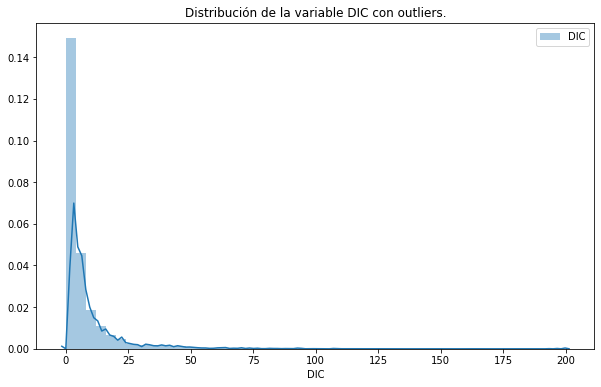

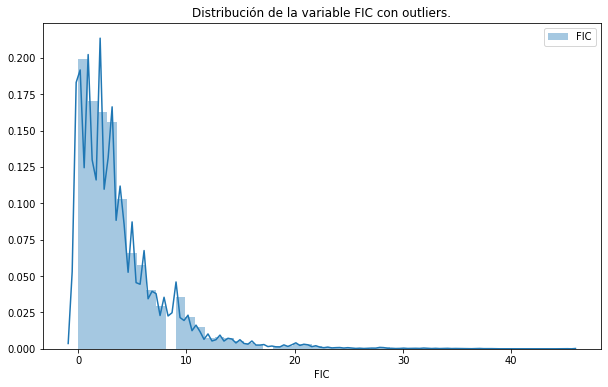

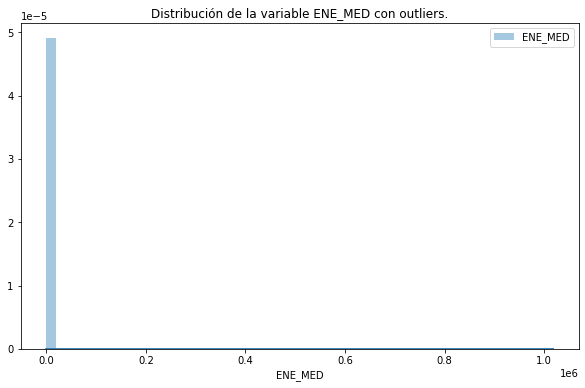

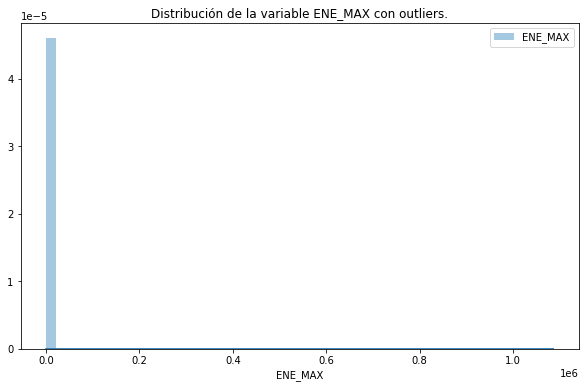

In [ ]:
def print_main_staticians_distributions(dataset, statisticians, has_outliers):
    outliers_word = 'sin'
    for statician in statisticians:
        plt.figure(figsize=(10,6))
        if has_outliers == True:
            outliers_word = 'con'
        title = "Distribución de la variable " + statician + " " + outliers_word + " outliers."
        plt.title(title)
        seaborn.distplot(dataset[statician], label=statician)
        plt.legend()
        
print_main_staticians_distributions(_ds, main_statisticians, True)

DIC con outliers: La variable t DIC es continua con valores no negativos, tenemos que el comportamiento de los datos no se distribuye de forma normal, la distribución se asemeja a una distribución exponencial. Podemos suponer que $f(t)=ke^{lt} $   t>0 es su función de densidad de probabilidad y resolver el problema 
-$\int _0 ^\infty f=1$-$f$ interpole a la muestra dejando un error cuadrático mínimo. 

Esto se traduce en un problema de multiplicadores de Lagrange. 

FIC con outliers: La variable n FIC es discreta con valores no negativos, la distribución se asemeja a una distribución Poisson. Podemos suponer que posee el parámetro $\lambda$  de densidad de probabilidad y resolver el problema 

$f(n)=e^{-\lambda}\lambda^n /n! $  interpole a la muestra dejando un error cuadrático mínimo.






Para las variables ENE_MAX y ENE_MED, es dificil a simple vista reconocer su distribución. Mas adelante se la vuelve a analizar sin outliers.



#### Calcule los principales estadísticos después del preprocesamiento.


In [ ]:
_ds_without_outliers = _ds
for statician in main_statisticians:
    _ds_without_outliers = clean_outliers(_ds_without_outliers, statician)

print("\nPrincipales estadisticos con outliers: ")
display(_ds[main_statisticians].describe())
print("\nPrincipales estadisticos sin outliers: ")
display(_ds_without_outliers[main_statisticians].describe())


Principales estadisticos con outliers: 


,DIC,FIC,ENE_MED,ENE_MAX
count,108346.000000,108346.000000,1.083460e+05,1.083460e+05
mean,6.441802,3.781829,1.870045e+02,2.521189e+02
std,11.522485,4.247625,3.218501e+03,3.453332e+03
min,0.000000,0.000000,-6.300000e+02,0.000000e+00
25%,0.460000,1.000000,6.191667e+01,9.700000e+01
50%,2.430000,3.000000,1.185000e+02,1.630000e+02
75%,7.120000,5.000000,1.880000e+02,2.450000e+02
max,199.820000,45.000000,1.018162e+06,1.085849e+06



Principales estadisticos sin outliers: 


,DIC,FIC,ENE_MED,ENE_MAX
count,77097.000000,77097.000000,77097.000000,77097.000000
mean,2.530133,2.181200,112.567304,152.833599
std,2.839496,1.775081,71.199308,83.470240
min,0.000000,0.000000,-45.833333,0.000000
25%,0.130000,1.000000,55.416667,90.000000
50%,1.550000,2.000000,106.166667,148.000000
75%,4.020000,3.000000,163.000000,212.000000
max,12.410000,6.000000,308.000000,345.000000


Despues del preprocesamiento y análisis sin outliers los estadisticos de nuestras variables seleccionadas, sufren un cambio significativo la variable DIC pasó de tener un promedio de interrupciones de 6.44 horas a 2.53 horas a causa de que los outliers extraidos representan 14% de los datos.



#### A continuación mostramos las variables y su distribución sin outliers: 

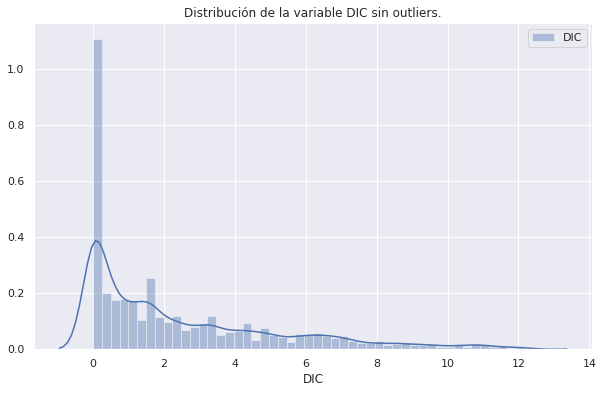

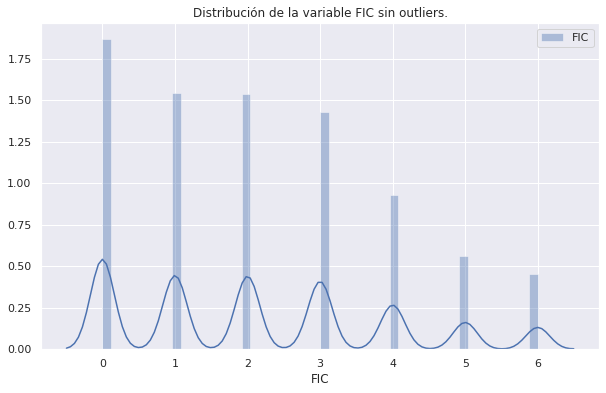

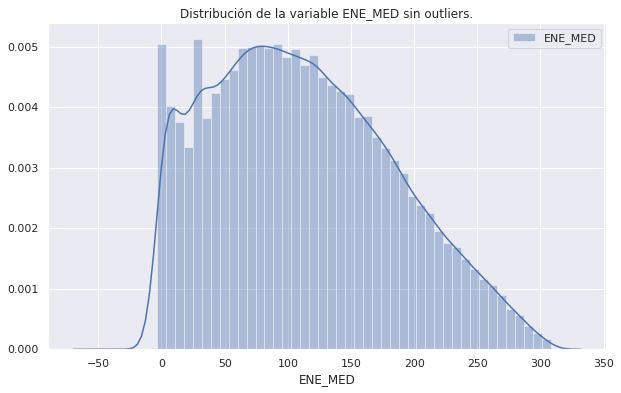

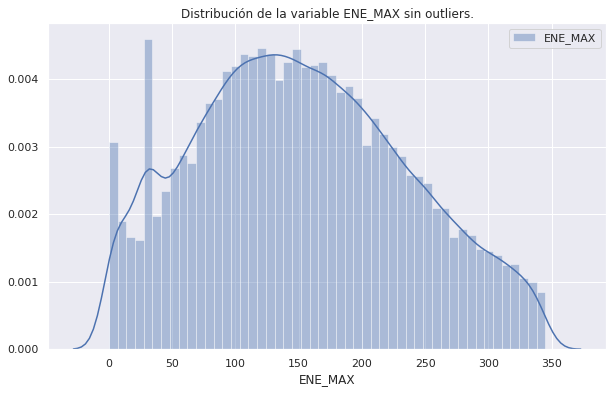

In [ ]:
print_main_staticians_distributions(_ds_without_outliers, main_statisticians, False)

Ahora, despues de remover los valores outliers, podemos observar como la distribución de la variable ENE_MED toma forma de normal, lo mismo para la variable ENE_MAX

#### ¿Cuáles son las variables categóricas? ¿Cual es la cardinalidad de las mismas?

Las variables categóricas que encontramos en el dataset son:


In [ ]:
cat_ft

Index(['DIST', 'PAC', 'PN_CON', 'UNI_TR_D', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
       'MUN', 'BRR', 'CEP', 'CLAS_SUB', 'CNAE', 'TIP_CC', 'FAS_CON', 'GRU_TEN',
       'TEN_FORN', 'GRU_TAR', 'SIT_ATIV', 'LIV', 'DESCR', 'ARE_LOC'],
      dtype='object')

In [ ]:
table = []

for category in cat_ft:
    row = []
    cardinality = len(_ds[category].unique())
    most_three_repeated = _ds[category].value_counts()[:3].index.tolist()
    most_three_repeated
    row.append(category)
    row.append(cardinality)
    row.append(most_three_repeated)
    table.append(row)
    
table_table = pd.DataFrame(table, columns=['Category Column', 'Cardinality', 'Most three repeated'])
table_table

,Category Column,Cardinality,Most three repeated
0,DIST,1,[6612]
1,PAC,55532,"[75364036753377719BT, 75587830754077028BT, 75566900753368900BT]"
2,PN_CON,18377,"[27134304, 27135283, 50626307]"
3,UNI_TR_D,3533,"[26877243, 26880443, 26877286]"
4,CTMT,31,"[27117485, 27117512, 27117500]"
5,UNI_TR_S,8,"[27707861, 27707625, 27708102]"
6,SUB,7,"[27335511, 27335510, 27335509]"
7,CONJ,6,"[16070, 15615, 16069]"
8,MUN,2,"[3303401, 3300506]"
9,BRR,184,"[CENTRO, CONS PAULINO, OLARIA]"


#### En base a la respuesta anterior, ¿vale la manera mantenerlas a todas?


Para nuestro análisis podríamos quitar las variables que creamos que no son relevantes. Deberíamos elegir aquellas que consideramos que no aportan significado relevante para nuestro estudio y particularmente para la predicción de cortes en el futuro.

#### Escoja 2 variables y grafique sus niveles contra la cantidad de apariciones.

Elegimos las variables CLAS_SUB y FAS_CON por una cuestión de que su cardinalidad es baja y es más fácil graficarlas.

##### CLAS_SUB:

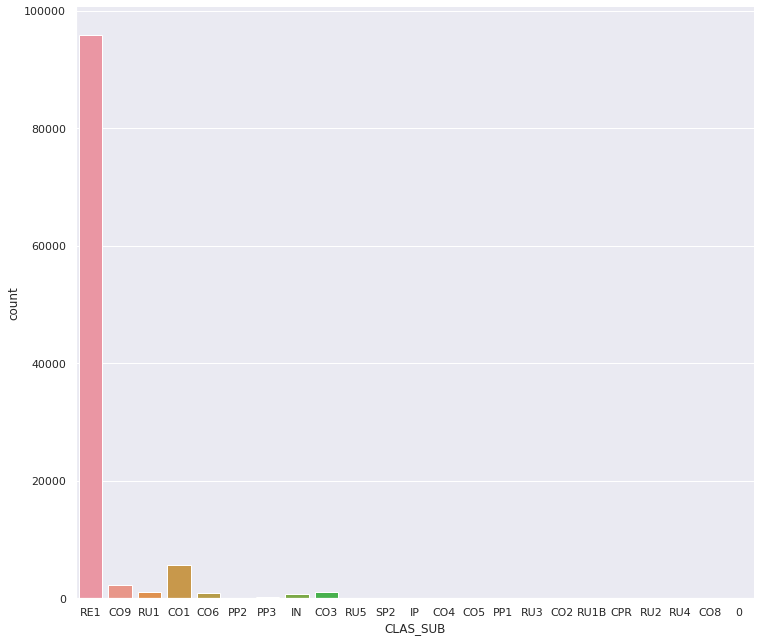

In [ ]:
g = sns.catplot(x="CLAS_SUB", kind="count", data=_ds)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

##### FAS_CON:

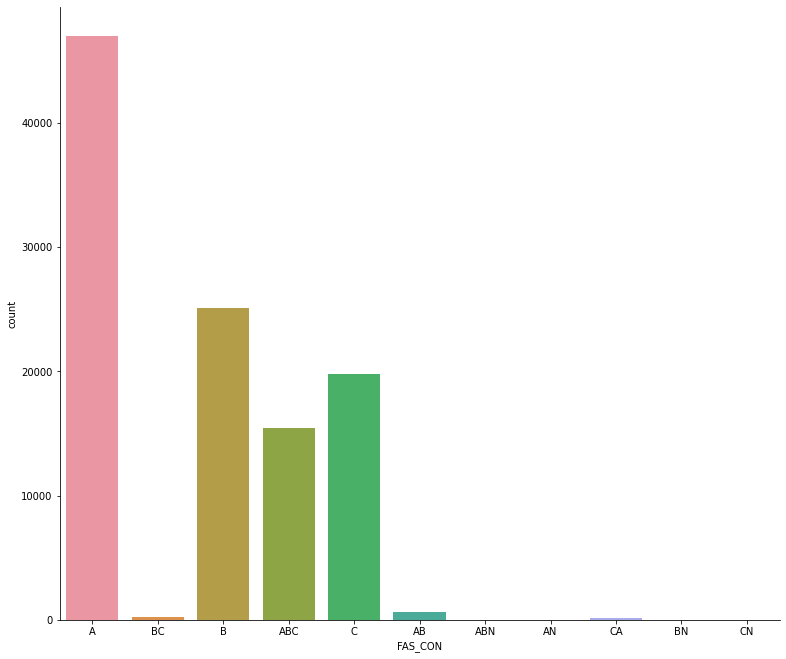

In [ ]:
g = sns.catplot(x="FAS_CON", kind="count", data=_ds)
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

#### Cuando sea posible, calcule la correlación entre cada variable y la salida, y entre variables.

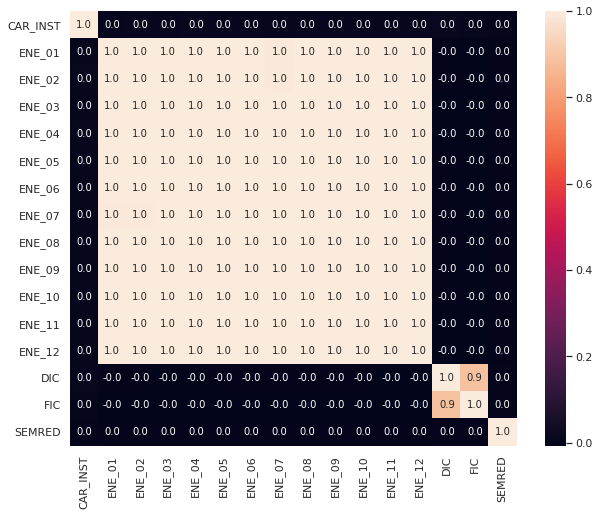

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(_ds[num_ft].corr(), annot=True, annot_kws={"size": 10},fmt=".1f")

Con el mapa de calor podemos observar las correlaciones que existen entre las variables numéricas. Para la DIC y la FIC que son nuestras variables de salida de interés, podemos observar que para todas las variables numéricas, con estas dos, tienen una correlación de 0. Es decir, no hay relación entre las variables numéricas y la salida.

#### ¿Cuál es la variable de mayor correlación con la salida?.


Las variables de salida FIC y DIC no poseen correlación con las variables numéricas. Esto lo podemos ver en el mapa de calor anterior.

#### ¿Qué variables están altamente correlacionadas entre sí? ¿qué se puede hacer con ellas?

Las variables correlacionadas entre si son los consumos mensuales de los usuarios, lo que podríamos hacer con ellas es reemplazarlas por su media, es decir en vez de trabajar con los doce meses de consumo, trabajar con el consumo promedio mensual de cada usuario.

También trabajar con el consumo de energia total de los 12 meses agrupado es mejor para el estudio, ya que las variables de salida DIC y FIC estan referidas al ciclo anual.

#### Escoja una variable categórica y calcule las distribuciones condicionales para cada nivel de la misma.

(0.0, 120.0)

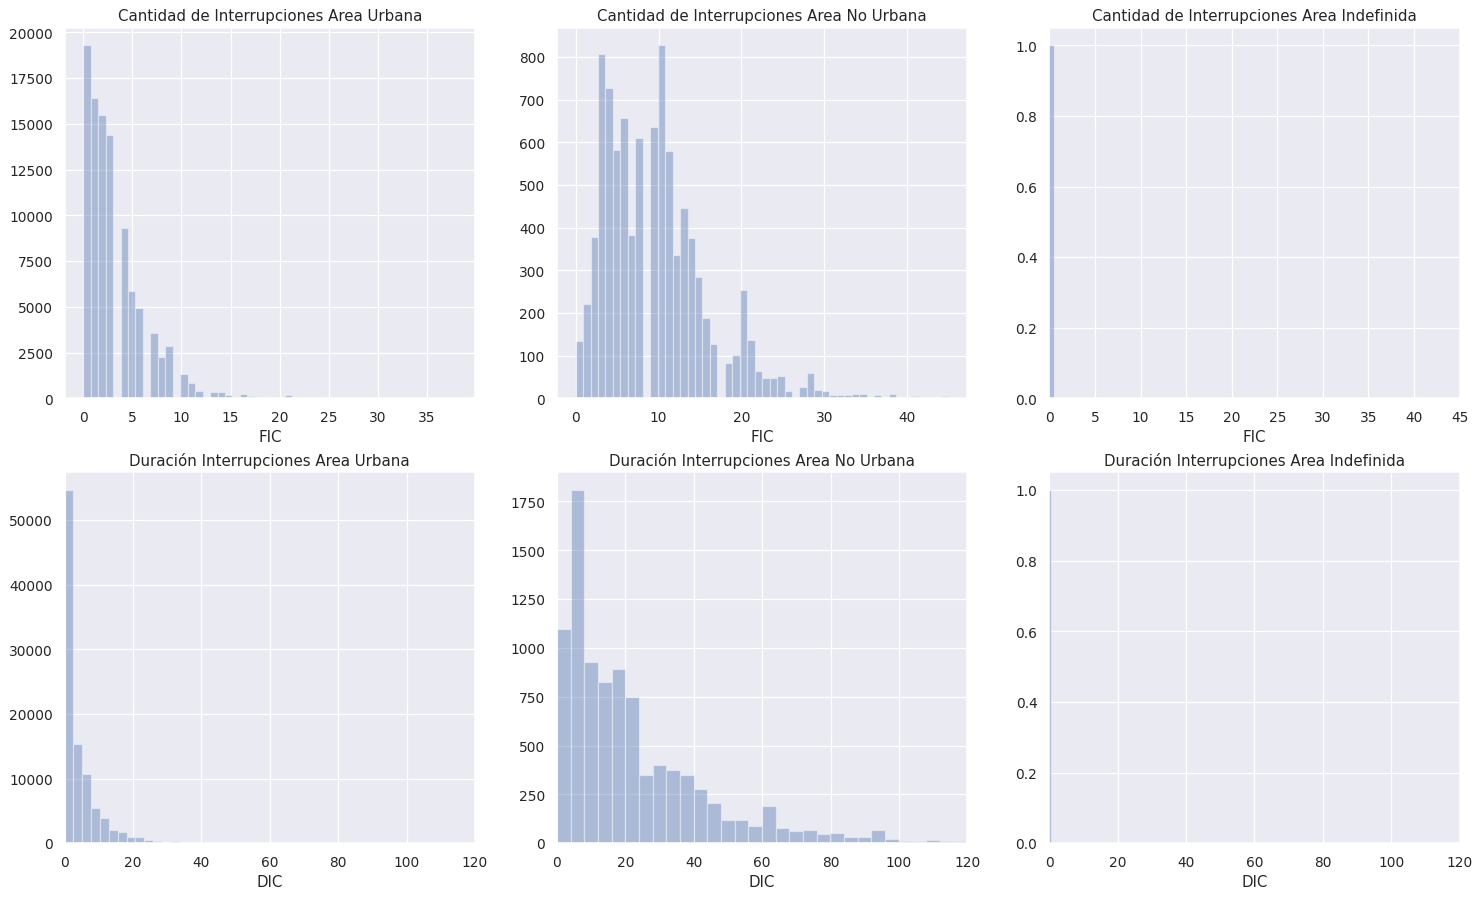

In [ ]:
#La variable categorica elegida ARE_LOC representa a las distintas áreas donde se distribuye el servicio de energia
sns.set()
figure(num=None, figsize=(20, 12), dpi=90)
       
subplot(2,3,1)
title('Cantidad de Interrupciones Area Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['FIC'],kde=False)

subplot(2,3,2)
title('Cantidad de Interrupciones Area No Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['FIC'],kde=False)

subplot(2,3,3)
title('Cantidad de Interrupciones Area Indefinida')
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['FIC'],kde=False)
plt.xlim(0, 45)
subplot(2,3,4)
title('Duración Interrupciones Area Urbana')

sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['DIC'],kde=False)
plt.xlim(0, 120)
subplot(2,3,5)
title('Duración Interrupciones Area No Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['DIC'],kde=False)
plt.xlim(0, 120)
subplot(2,3,6)
title('Duración Interrupciones Area Indefinida')
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['DIC'],kde=False)
plt.xlim(0, 120)

In [ ]:
_ds.groupby('ARE_LOC').count()['DIC']

ARE_LOC
0         1
NU     9308
UB    99037
Name: DIC, dtype: int64

#### ¿Cómo podemos saber si las distribuciones condicionales son diferentes entre ellas?


A través de un test de hipótesis de independencia de variables, se puede saber su independencia con cierto grado de confiablidad. 

## 3. Preguntas Disparadoras

#### ¿Cómo se distribuye el consumo mensual del dataset de forma global, por categoría tarifaria (GRU_TAR) y por alimentador (CTMT)?

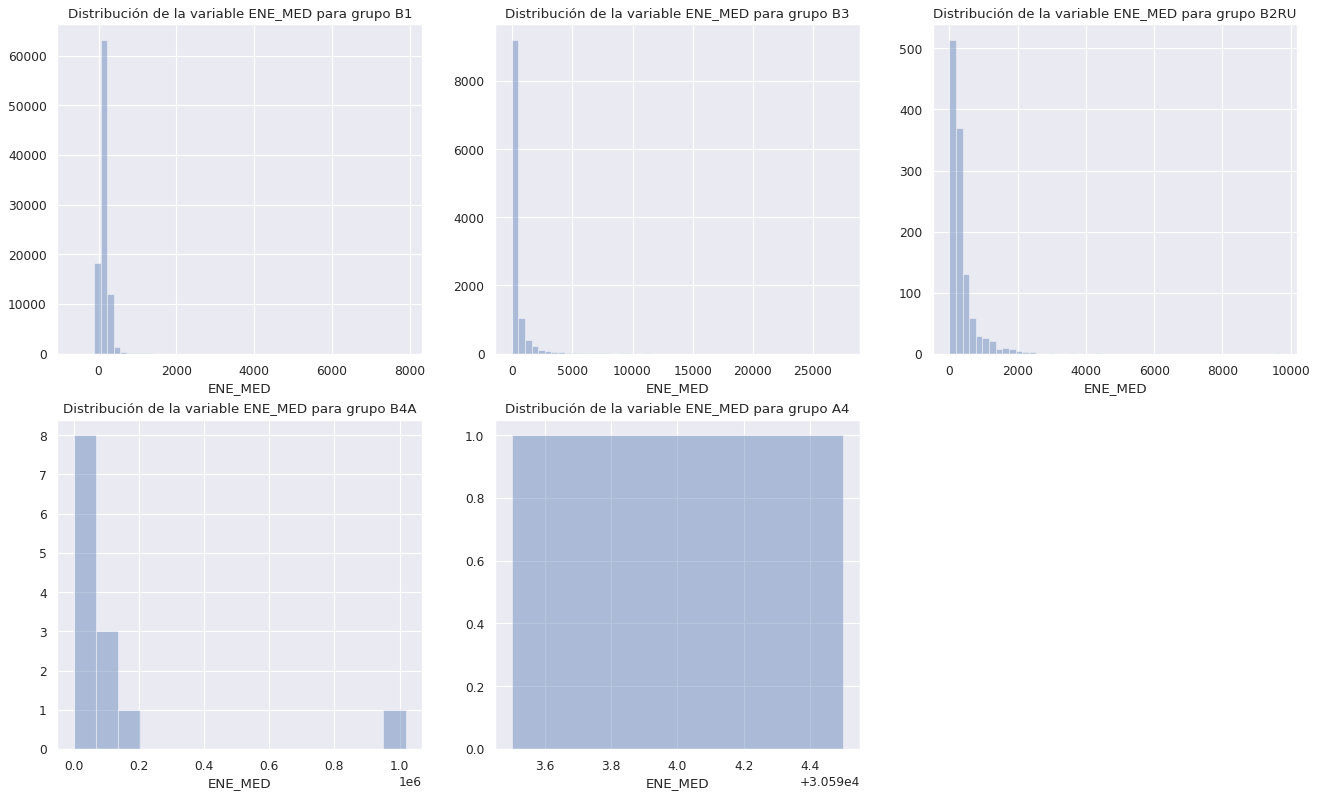

In [ ]:
#DISTRIBUCIÓN DE ENERGIA POR CATEGORIA TARIFARIA(GRU_TAR)
np.seterr(divide='ignore', invalid='ignore')

figure(num=None, figsize=(20, 12), dpi=80)


plt.subplot(2,3,1)
plt.title("Distribución de la variable ENE_MED para grupo B1")
sns.distplot(_ds[_ds['GRU_TAR'] == 'B1']['ENE_MED'],kde=False)

plt.subplot(2,3,2)
plt.title("Distribución de la variable ENE_MED para grupo B3")
sns.distplot(_ds[_ds['GRU_TAR'] == 'B3']['ENE_MED'],kde=False)

plt.subplot(2,3,3)
plt.title("Distribución de la variable ENE_MED para grupo B2RU")
sns.distplot(_ds[_ds['GRU_TAR'] == 'B2RU']['ENE_MED'],kde=False)

plt.subplot(2,3,4)
plt.title("Distribución de la variable ENE_MED para grupo B4A")
sns.distplot(_ds[_ds['GRU_TAR'] == 'B4A']['ENE_MED'],kde=False)


plt.subplot(2,3,5)
plt.title("Distribución de la variable ENE_MED para grupo A4")

sns.distplot(_ds[_ds['GRU_TAR'] == 'A4']['ENE_MED'],kde=False)



In [ ]:
_ds['GRU_TAR'].value_counts(normalize=True).reset_index()

,index,GRU_TAR
0,B1,0.884509
1,B3,0.104415
2,B2RU,0.010946
3,B4A,0.000120
4,A4,0.000009


Grupo B1: Es el Grupo con mayor cantidad de usuarios(88%) , presenta valores negativos para algunos usuarios (podrian estar entregando energia al sistema), y el resto sería de menor consumo relativo a los otros grupos.

Grupo B3: Es el segundo grupo en cantidad de usuarios aprox es el 10% , La mayoria de los usuarios consume mas de 500 kWh algunos pudiendo llegar a los 4000 kWh.

Grupo B2RU: Representa un 1.0946% aproxidamente del total de los consumidores

Grupo B4A: Apenas 13 usuarios.

Grupo A4: un usuario

(0.0, 1.0)

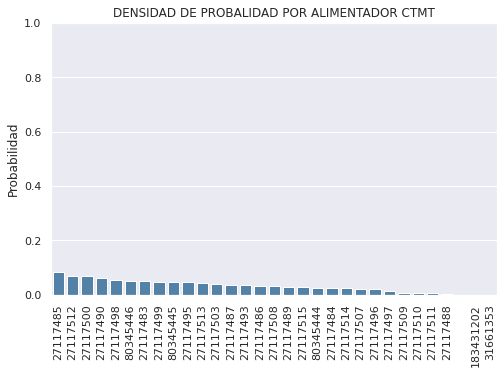

In [ ]:
#Densidad de probablidad por Alimentador CTMT 
data = _ds.CTMT.value_counts(normalize=True)
plt.figure(figsize=(8, 5))
seaborn.barplot(x=data.index, y=data.values, color='steelblue')
plt.title("DENSIDAD DE PROBALIDAD POR ALIMENTADOR CTMT")
plt.ylabel("Probabilidad")
plt.xticks(rotation=90)
plt.ylim(0, 1)

La distribución de energía en el año 2018, cuenta con 31 circuitos de media tensión(CTMT) . El alimentador ·27117485 tiene la mayor cantidad de usuarios el alimentador Nº 31661353 con un usuario.

In [ ]:
# Observamos que existe solo 1 usuario en la categoria tarifaria A4 . Verificamos
_ds.groupby('CTMT').count()['ENE_MED']

CTMT
               25
183431202       9
27117483     5257
27117484     2592
27117485     8905
27117486     3331
27117487     3964
27117488      357
27117489     3020
27117490     6623
27117493     3700
27117495     4950
27117496     2108
27117497     1642
27117498     5744
27117499     5233
27117500     7516
27117503     4410
27117507     2202
27117508     3280
27117509      861
27117510      742
27117511      574
27117512     7614
27117513     4657
27117514     2480
27117515     2908
31661353        1
80345444     2810
80345445     5214
80345446     5617
Name: ENE_MED, dtype: int64

#### ¿Cuántos consumidores tienen un consumo mensual promedio superior a 100 kWh? Y más de 500 kWh?

In [ ]:
Consumo_superior100kWh =(_ds.ENE_MED >100) 
count_nonzero(Consumo_superior100kWh)

62857

son 62857 usuarios los que tienen consumos superiores a 100kWh

In [ ]:
Consumo_superior500kWh = (_ds.ENE_MED >500)
count_nonzero(Consumo_superior500kWh)

3484

son 3484 usuarios los que tienen consumos superiores a 500kWh

#### ¿Cómo se correlacionan el consumo mensual y la categoría tarifaria? Explorar las métricas o estadísticos dentro de cada clase y compararlas.

In [ ]:
# Observamos que existe solo 1 usuario en la categoria tarifaria A4 . Verificamos
_ds.groupby('GRU_TAR').count()['ENE_MED']

GRU_TAR
A4          1
B1      95833
B2RU     1186
B3      11313
B4A        13
Name: ENE_MED, dtype: int64

Text(0.5, 1.0, 'CONSUMO ENE_MED POR CATEGORIA TARIFA CON OUTLIERS')

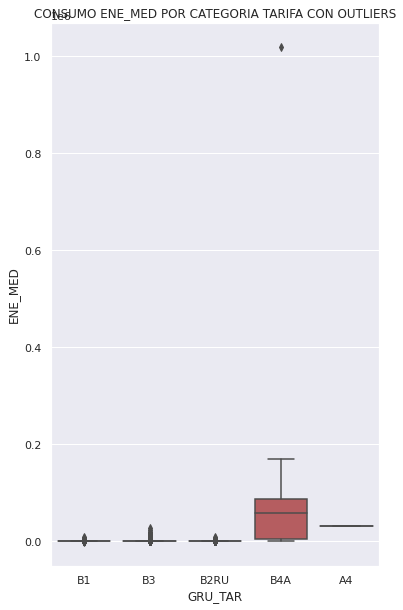

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot(x= 'GRU_TAR', y='ENE_MED', data=_ds)
plt.title("CONSUMO ENE_MED POR CATEGORIA TARIFA CON OUTLIERS")


Solo se pude observar que para la categoria tarifaria B4A los datos atipicos con alto consumo, recordemos que solo se encuentran 13 usuarios en esta categoria B4A, y el grupo A4 solo un consumidor. Por lo tanto acotaremos el análisis posterior para ver el comportamiento de las categorias sin outliers

(-50.0, 350.0)

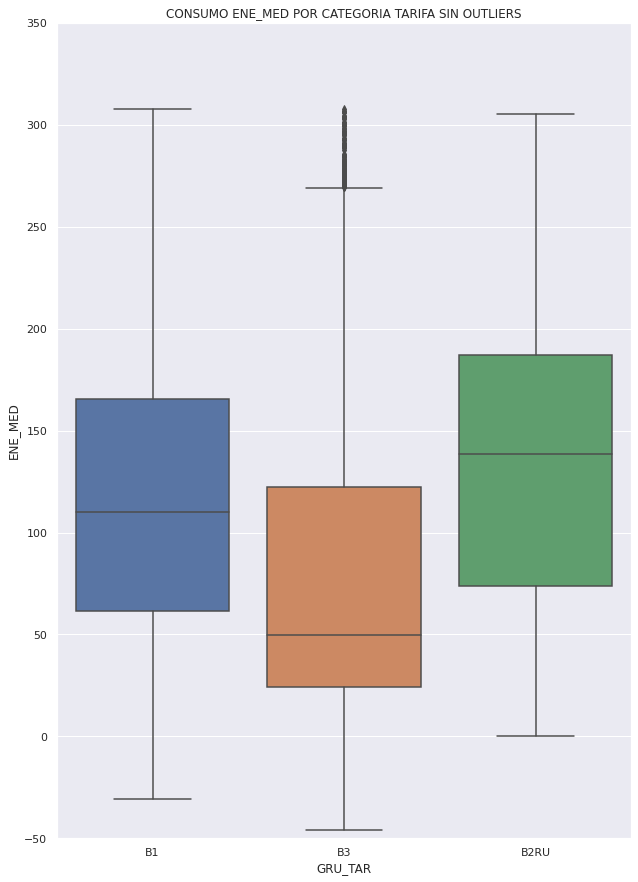

In [ ]:

plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x= 'GRU_TAR', y='ENE_MED', data=_ds_without_outliers)
plt.title("CONSUMO ENE_MED POR CATEGORIA TARIFA SIN OUTLIERS")
plt.ylim(-50, 350)

Realizando el analisis sobre el dataset sin datos atipicos, y se pueden apreciar aun los datos atipicos para la categoria tarifaria B3 pero sin casos aislados.Se puede apreciar tambien la existencia de consumos negativos para las categorias B1 y B3.

In [ ]:
Media_ConsumoB1 = _ds[_ds.GRU_TAR == 'B1'][['ENE_MED']].mean()
print(Media_ConsumoB1 )
Media_ConsumoB3 = _ds[_ds.GRU_TAR == 'B3'][['ENE_MED']].mean()
print(Media_ConsumoB3 )
Media_ConsumoB2RU = _ds[_ds.GRU_TAR == 'B2RU'][['ENE_MED']].mean()
print(Media_ConsumoB2RU )
Media_ConsumoB4A = _ds[_ds.GRU_TAR == 'B4A'][['ENE_MED']].mean()
print(Media_ConsumoB4A )


ENE_MED    137.559668
dtype: float64
ENE_MED    438.967199
dtype: float64
ENE_MED    355.461074
dtype: float64
ENE_MED    127709.833333
dtype: float64


La categoria tarifaria B4A tiene mayor promedio de consumo con respecto a las otras categorias, pero en esta categoría B4A solamente hay 13 usuarios.

In [ ]:
Mediana_ConsumoB1 = _ds[_ds.GRU_TAR == 'B1'][['ENE_MED']].median()
print(Mediana_ConsumoB1 )
Mediana_ConsumoB3 = _ds[_ds.GRU_TAR == 'B3'][['ENE_MED']].median()
print(Mediana_ConsumoB3 )
Mediana_ConsumoB2RU = _ds[_ds.GRU_TAR == 'B2RU'][['ENE_MED']].median()
print(Mediana_ConsumoB2RU )
Mediana_ConsumoB4A = _ds[_ds.GRU_TAR == 'B4A'][['ENE_MED']].median()
print(Mediana_ConsumoB4A )


ENE_MED    117.916667
dtype: float64
ENE_MED    115.5
dtype: float64
ENE_MED    222.583333
dtype: float64
ENE_MED    58163.666667
dtype: float64


La media de consumo del grupo B1 esta en 137.5 kWh y la mediana nos indica que el 50 % de los usuarios en B1 tiene un consumo de hasta 117.9 kWh aproximadamente.Para el grupo tarifario B3 el 50% de los usuarios tuvieron un consumo de hasta 115.5 kWh y el promedio de consumo es de 438.96kWh

#### ¿Cómo se distribuyen el consumo promedio, el FIC y el DIC y el Conjunto Eléctrico (CONJ), el Alimentador (CTMT), el Transformador de Distribucion (UNI_TR_D), la categoria tarifaria (GRU_TAR) y Localización(ARE_LOC)? Explorar las métricas o estadísticos dentro de cada y compararlas.

(0.0, 10.0)

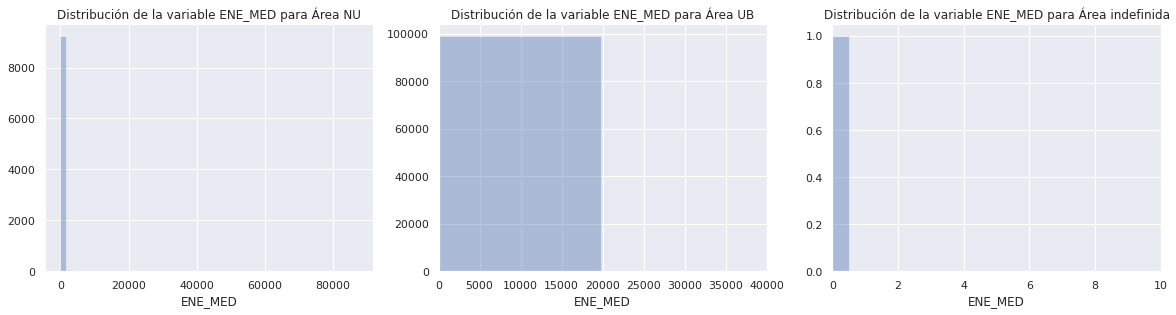

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title("Distribución de la variable ENE_MED para Área NU")
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['ENE_MED'],kde=False)

plt.subplot(2,3,2)
plt.title("Distribución de la variable ENE_MED para Área UB")
sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['ENE_MED'],kde=False)
plt.xlim(0, 40000)



plt.subplot(2,3,3)
plt.title("Distribución de la variable ENE_MED para Área indefinida")
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['ENE_MED'],kde=False)
plt.xlim(0, 10)


(0.0, 10.0)

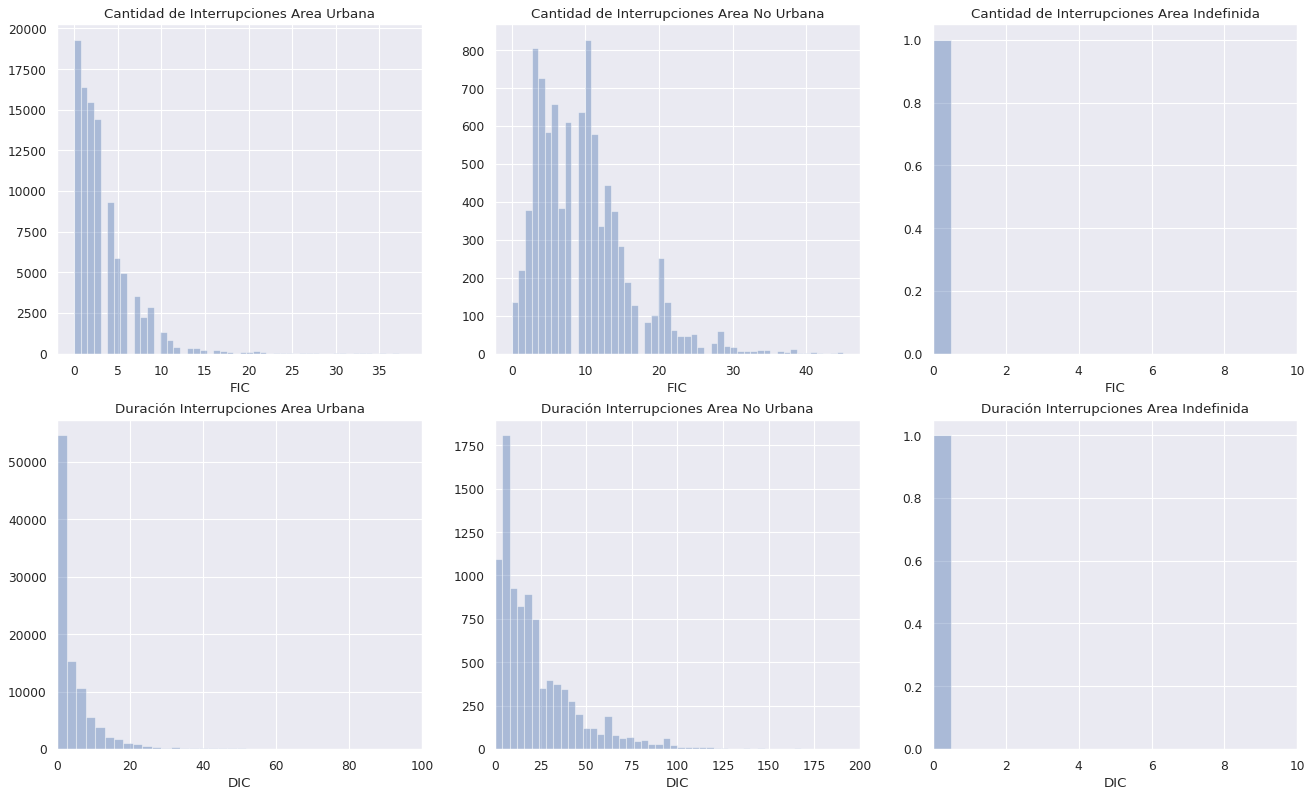

In [ ]:
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(20, 12), dpi=80)
       
subplot(2,3,1)
title('Cantidad de Interrupciones Area Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['FIC'],kde=False)
subplot(2,3,2)
title('Cantidad de Interrupciones Area No Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['FIC'],kde=False)
subplot(2,3,3)
title('Cantidad de Interrupciones Area Indefinida')
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['FIC'],kde=False)
plt.xlim(0, 10)
subplot(2,3,4)
title('Duración Interrupciones Area Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'UB']['DIC'],kde=False)
plt.xlim(0, 100)
subplot(2,3,5)
title('Duración Interrupciones Area No Urbana')
sns.distplot(_ds[_ds['ARE_LOC'] == 'NU']['DIC'],kde=False)
plt.xlim(0, 200)
subplot(2,3,6)
title('Duración Interrupciones Area Indefinida')
sns.distplot(_ds[_ds['ARE_LOC'] == '0']['DIC'],kde=False)
plt.xlim(0, 10)

El comportamiento de la variable FIC en el área urbana es diferente del comportamiento en el área no urbana. Se puede decir que los datos FIC en el área urbana tienen una distribución que se asemeja a una distribución de Poisson. Mas de cincuenta mil usuarios tienen interrupciones en su servicio de energía en el área urbana. Los usuarios que han tenido mayor duración de interrupciones, se encuentran en área no urbana. El comportamiento de los datos DIC en el área urbana se asemeja a una distribución exponencial.

Los valores que tenemos para la variable CONJ son:  ['15616' '16069' '16070' '15615' '16068' '13761']


(0.0, 10.0)

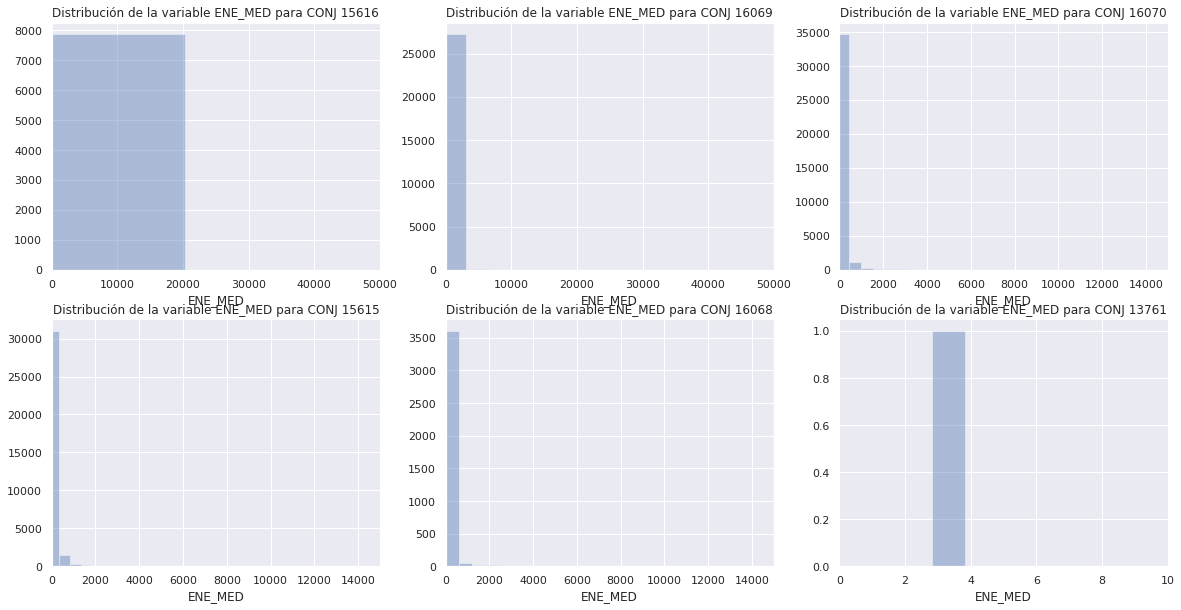

In [ ]:
print("Los valores que tenemos para la variable CONJ son: ", _ds['CONJ'].unique())
plt.figure(figsize=(20,10))

subplot(2,3,1)
title('Distribución de la variable ENE_MED para CONJ 15616')
sns.distplot(_ds[_ds['CONJ'] == '15616']['ENE_MED'],kde=False)
plt.xlim(0, 50000)

subplot(2,3,2)
title('Distribución de la variable ENE_MED para CONJ 16069')
sns.distplot(_ds[_ds['CONJ'] == '16069']['ENE_MED'],kde=False)
plt.xlim(0, 50000)

subplot(2,3,3)
title('Distribución de la variable ENE_MED para CONJ 16070')
sns.distplot(_ds[_ds['CONJ'] == '16070']['ENE_MED'],kde=False)
plt.xlim(0, 15000)

subplot(2,3,4)
title('Distribución de la variable ENE_MED para CONJ 15615')
sns.distplot(_ds[_ds['CONJ'] == '15615']['ENE_MED'],kde=False)
plt.xlim(0, 15000)

subplot(2,3,5)
title('Distribución de la variable ENE_MED para CONJ 16068')
sns.distplot(_ds[_ds['CONJ'] == '16068']['ENE_MED'],kde=False)
plt.xlim(0, 15000)

subplot(2,3,6)
title('Distribución de la variable ENE_MED para CONJ 13761')
sns.distplot(_ds[_ds['CONJ'] == '13761']['ENE_MED'],kde=False)
plt.xlim(0, 10)

Para las variables UNI_TR_D y CTMT, al tener una gran cantidad de distintos valores, creemos que no vale la pena representar los histogramas del consumo promedio mensual en base a estos valores.

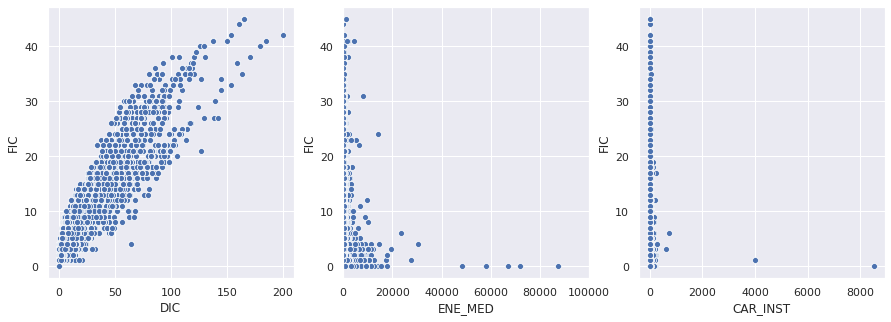

In [ ]:
# Para relacionar variables numéricas podemos usar un ScatterPlot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x= 'DIC', y='FIC', data=_ds)

plt.subplot(1,3,2)
sns.scatterplot(x= 'ENE_MED', y='FIC', data=_ds)
plt.xlim(0, 100000)

plt.subplot(1,3,3)
sns.scatterplot(x= 'CAR_INST', y='FIC', data=_ds)

Se puede apreciar que entre las variables DIC Y FIC  hay un correlación fuerte entre ellas. 